<a href="https://colab.research.google.com/github/Abhijeetkumar710/Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB
None

 First 5 Rows:
   accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard

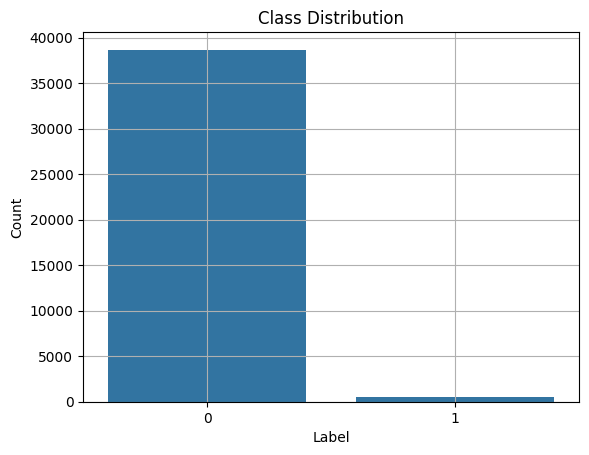

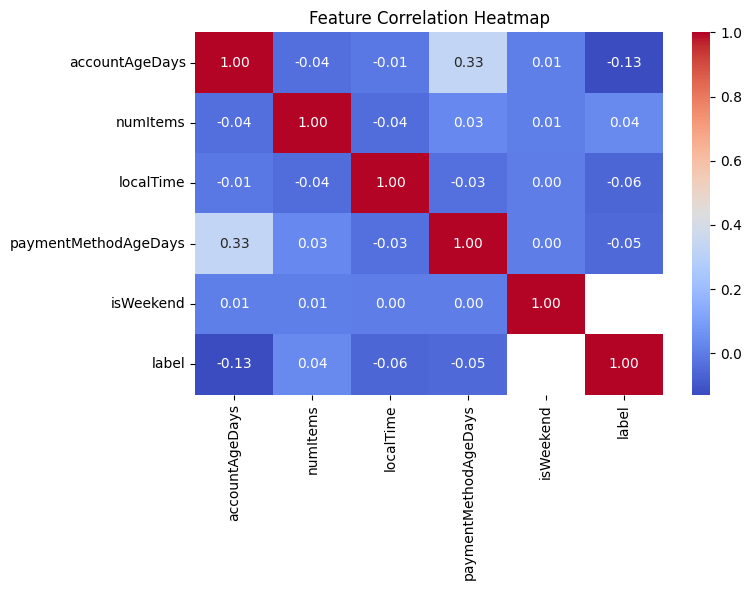

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Handling imbalance
from imblearn.over_sampling import SMOTE

# For warnings
import warnings
warnings.filterwarnings('ignore')

# phase 1 Data Exploration & Cleaning


df = pd.read_csv('/content/drive/MyDrive/payment_fraud.csv')


# 1. Basic info
print(" Basic Info:")
print(df.info())

# 2. Preview data
print("\n First 5 Rows:")
print(df.head())

# 3. Missing values
print("\n Missing Values:")
print(df.isnull().sum())

# 4. Duplicate rows
print("\n Duplicate Rows:", df.duplicated().sum())

# 5. Data types
print("\n Data Types:")
print(df.dtypes)

# 6. Target distribution
print("\n Label Distribution (0 = Legit, 1 = Fraud):")
print(df['label'].value_counts(normalize=True))

# 7. Class balance plot
sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 8. Correlation heatmap (numerical only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
matrix = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

transpose = [[matrix [j][i] for j in range (3)] for i in range (3)]

print("Original matrix:")
for row in matrix:
  print (row)
print("\nTranspose")
for row in transpose:
  print (row)

Original matrix:
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]

Transpose
[1, 4, 7]
[2, 5, 8]
[3, 6, 9]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [ ]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [ ]:
df.isnull().sum()

,0
accountAgeDays,0
numItems,0
localTime,0
paymentMethod,0
paymentMethodAgeDays,0
Category,95
isWeekend,560
label,0


In [ ]:
print("\n Data Types:")
print(df.dtypes)


 Data Types:
accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
label                     int64
dtype: object


In [ ]:
 #6. Target distribution
print("\n Label Distribution (0 = Legit, 1 = Fraud):")
print(df['label'].value_counts(normalize=True))



 Label Distribution (0 = Legit, 1 = Fraud):
label
0    0.985722
1    0.014278
Name: proportion, dtype: float64


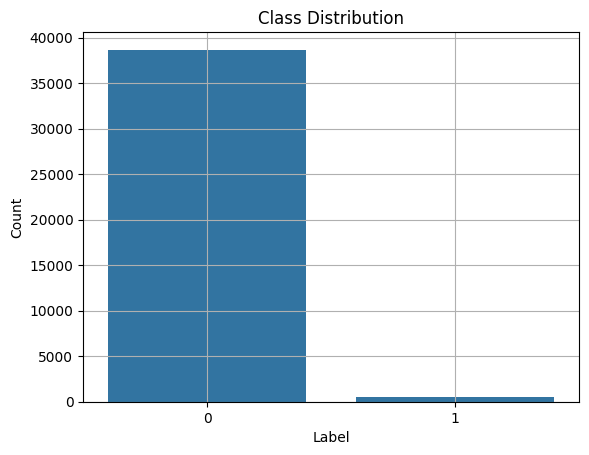

In [ ]:
# 7. Class balance plot
sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True)
plt.show()

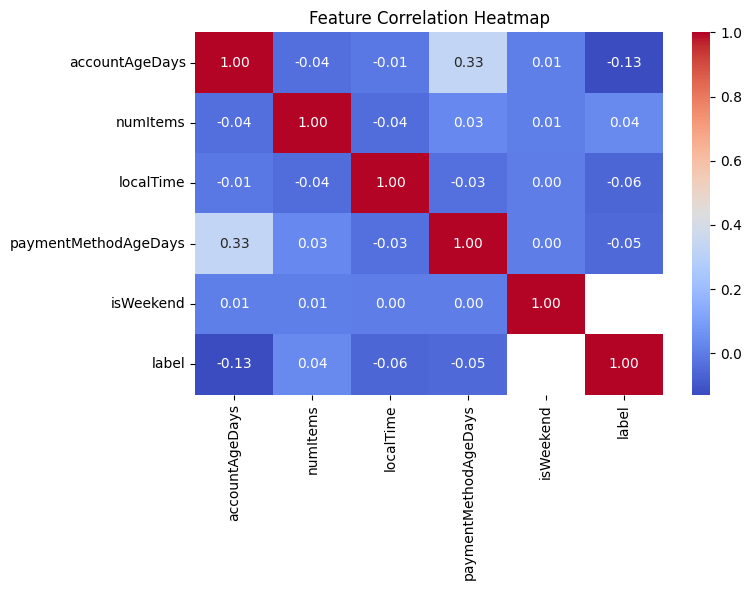

In [ ]:
# 8. Correlation heatmap (numerical only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
#phase2 Exploratory Data Analysis



#loadind data set and cleaning path
df = pd.read_csv('/content/drive/MyDrive/payment_fraud.csv')
df_clean = df.copy()

# Handle missing values
df_clean['isWeekend'].fillna(df_clean['isWeekend'].mode()[0], inplace=True)
df_clean['Category'].fillna(df_clean['Category'].mode()[0], inplace=True)

# Label encode categorical features
le = LabelEncoder()
df_clean['paymentMethod'] = le.fit_transform(df_clean['paymentMethod'])
df_clean['Category'] = le.fit_transform(df_clean['Category'])

# Scale numerical features
scaler = StandardScaler()
num_cols = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# Final checks
print(" Missing values:\n", df_clean.isnull().sum())
print("\n Data types:\n", df_clean.dtypes)
print("\n Target distribution:\n", df_clean['label'].value_counts())


 Missing values:
 accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

 Data types:
 accountAgeDays          float64
numItems                float64
localTime               float64
paymentMethod             int64
paymentMethodAgeDays    float64
Category                  int64
isWeekend               float64
label                     int64
dtype: object

 Target distribution:
 label
0    38661
1      560
Name: count, dtype: int64


In [ ]:
# Handle missing values
df_clean['isWeekend'].fillna(df_clean['isWeekend'].mode()[0], inplace=True)
df_clean['Category'].fillna(df_clean['Category'].mode()[0], inplace=True)
print("Missing values:\n", df_clean.isnull().sum())

Missing values:
 accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64


/tmp/ipython-input-1875610045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['isWeekend'].fillna(df_clean['isWeekend'].mode()[0], inplace=True)
/tmp/ipython-input-1875610045.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
# Label encode categorical features
le = LabelEncoder()
df_clean['paymentMethod'] = le.fit_transform(df_clean['paymentMethod'])
df_clean['Category'] = le.fit_transform(df_clean['Category'])
print("\n Data types:\n", df_clean.dtypes)


 Data types:
 accountAgeDays          float64
numItems                float64
localTime               float64
paymentMethod             int64
paymentMethodAgeDays    float64
Category                  int64
isWeekend               float64
label                     int64
dtype: object


In [ ]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])
print("\n Data types:\n", df_clean.dtypes)

#to check class imbalance
print("\n Target distribution:\n", df_clean['label'].value_counts())




 Data types:
 accountAgeDays          float64
numItems                float64
localTime               float64
paymentMethod             int64
paymentMethodAgeDays    float64
Category                  int64
isWeekend               float64
label                     int64
dtype: object

 Target distribution:
 label
0    38661
1      560
Name: count, dtype: int64


In [ ]:
#phase 3 Feature Engineering



# Load data
df = pd.read_csv('/content/drive/MyDrive/payment_fraud.csv')

# 1 Handle missing values
df['isWeekend'].fillna(df['isWeekend'].mode()[0], inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

# 2 Label encode categorical columns
le = LabelEncoder()
df['paymentMethod'] = le.fit_transform(df['paymentMethod'])
df['Category'] = le.fit_transform(df['Category'])

# 3 Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# 4 Scale numerical columns
num_cols = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 5 Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 6 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# Basic checks
print(" Data shapes:")
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)
print("\n Target distribution in y_train:")
print(y_train.value_counts())
print("\n Target distribution in y_test:")
print(y_test.value_counts())


 Data shapes:
Train shape: (61857, 7)
Test shape : (15465, 7)

 Target distribution in y_train:
label
1    30929
0    30928
Name: count, dtype: int64

 Target distribution in y_test:
label
0    7733
1    7732
Name: count, dtype: int64



 Model: Logistic Regression
Confusion Matrix:
 [[7062  671]
 [   0 7732]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      7733
           1       0.92      1.00      0.96      7732

    accuracy                           0.96     15465
   macro avg       0.96      0.96      0.96     15465
weighted avg       0.96      0.96      0.96     15465

ROC AUC Score: 0.9896237689482442

 Model: Random Forest
Confusion Matrix:
 [[7733    0]
 [   0 7732]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7733
           1       1.00      1.00      1.00      7732

    accuracy                           1.00     15465
   macro avg       1.00      1.00      1.00     15465
weighted avg       1.00      1.00      1.00     15465

ROC AUC Score: 1.0


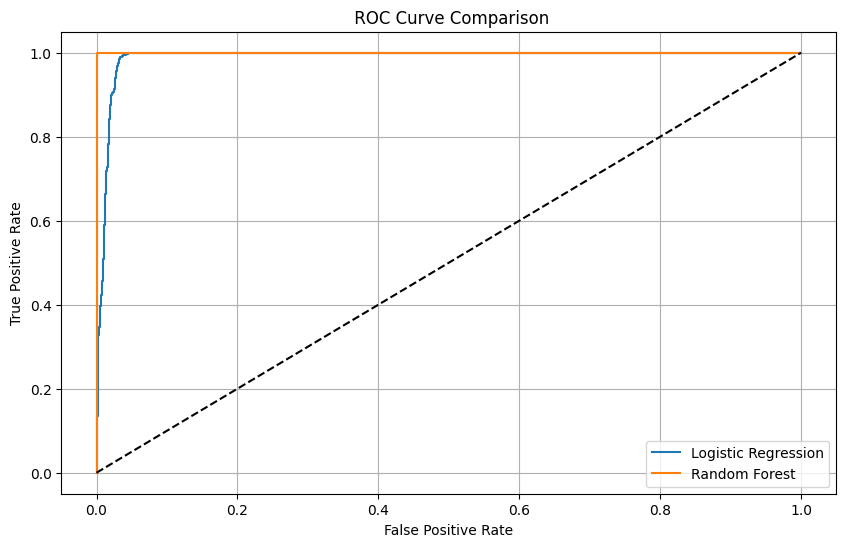

In [ ]:
#phase4 Handling Class Imbalance using SMOTE



#  Load dataset
df = pd.read_csv('/content/drive/MyDrive/payment_fraud.csv')

# Handle missing values
df['isWeekend'].fillna(df['isWeekend'].mode()[0], inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

#  Encode categorical columns
le = LabelEncoder()
df['paymentMethod'] = le.fit_transform(df['paymentMethod'])
df['Category'] = le.fit_transform(df['Category'])

# Define features & target
X = df.drop('label', axis=1)
y = df['label']

#  Standardize numerical columns
scaler = StandardScaler()
num_cols = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']
X[num_cols] = scaler.fit_transform(X[num_cols])

#  Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

#  Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

#  Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("ROC AUC Score:", roc_auc_score(y_true, y_prob))

#  Evaluate
evaluate_model("Logistic Regression", y_test, lr_preds, lr_probs)
evaluate_model("Random Forest", y_test, rf_preds, rf_probs)

#  ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#phase 5 Train-Test Split


# 1. Load data
df = pd.read_csv('/content/drive/MyDrive/payment_fraud.csv')

# 2. Clean missing
df['isWeekend'].fillna(df['isWeekend'].mode()[0], inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

# 3. Encode categoricals
le = LabelEncoder()
df['paymentMethod'] = le.fit_transform(df['paymentMethod'])
df['Category'] = le.fit_transform(df['Category'])

# 4. Features & target
X = df.drop('label', axis=1)
y = df['label']

# 5. Standardize numerical columns
scaler = StandardScaler()
num_cols = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']
X[num_cols] = scaler.fit_transform(X[num_cols])

# 6. Apply SMOTE for class balance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 8. Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 9. GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# 10. Best Model & Params
best_model = grid_search.best_estimator_
print("Best Hyperparameters:\n", grid_search.best_params_)

# 11. Evaluate best model
y_pred = best_model.predict(X_test)
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print(" ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters:
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Confusion Matrix:
 [[7733    0]
 [   0 7732]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7733
           1       1.00      1.00      1.00      7732

    accuracy                           1.00     15465
   macro avg       1.00      1.00      1.00     15465
weighted avg       1.00      1.00      1.00     15465

 ROC AUC: 1.0


In [ ]:
#phase6 Model Building & Evaluation with Random Forest



df = pd.read_csv('/content/drive/MyDrive/payment_fraud.csv')


# Handle missing values
df['isWeekend'].fillna(df['isWeekend'].mode()[0], inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

# Encode categorical features
le_payment = LabelEncoder()
le_category = LabelEncoder()
df['paymentMethod'] = le_payment.fit_transform(df['paymentMethod'])
df['Category'] = le_category.fit_transform(df['Category'])

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Scale numeric columns
scaler = StandardScaler()
num_cols = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']
X[num_cols] = scaler.fit_transform(X[num_cols])

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

#  5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

#  6. Train the RandomForest model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

# 7. Saving thr model and encoders
joblib.dump(model, 'rf_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(le_payment, 'le_payment.joblib')
joblib.dump(le_category, 'le_category.joblib')

#  8. Evaluate the model
y_pred = model.predict(X_test)
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

#  9. Inference Function
def predict_transaction(input_data: dict):
    # Load saved components
    model = joblib.load('rf_model.joblib')
    scaler = joblib.load('scaler.joblib')
    le_payment = joblib.load('le_payment.joblib')
    le_category = joblib.load('le_category.joblib')

    # Create DataFrame
    df_input = pd.DataFrame([input_data])

    # Encode
    df_input['paymentMethod'] = le_payment.transform(df_input['paymentMethod'])
    df_input['Category'] = le_category.transform(df_input['Category'])

    # Scale numericals
    df_input[num_cols] = scaler.transform(df_input[num_cols])

    # Align columns with training data
    df_input = df_input[X.columns]

    # Predict
    prediction = model.predict(df_input)[0]
    probability = model.predict_proba(df_input)[0][1]
    return {"prediction": int(prediction), "fraud_probability": round(probability, 4)}


#  10. Test Prediction
example_input = {
    'accountAgeDays': 350,
    'numItems': 2,
    'paymentMethod': 'paypal',
    'paymentMethodAgeDays': 180,
    'localTime': 14,
    'Category': 'shopping',
    'isWeekend': 1
  }

result = predict_transaction(example_input)
print("\n Prediction result:", result)


 Confusion Matrix:
 [[7733    0]
 [   0 7732]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7733
           1       1.00      1.00      1.00      7732

    accuracy                           1.00     15465
   macro avg       1.00      1.00      1.00     15465
weighted avg       1.00      1.00      1.00     15465

ROC AUC Score: 1.0

 Prediction result: {'prediction': 0, 'fraud_probability': np.float64(0.0)}
